# Module 2 Summative Lab

## Introduction

For today's section, we're going to work on a single big lab to apply everything we've learned in Mod 2!

## About This Lab

A quick note before getting started--this lab isn't like other labs you seen so far. This lab is meant to take ~8 hours to complete, so it's much longer and more challenging than the average labs you've seen so far. If you feel like this lab is challenging or that you might be struggling a bit, don't fret--that's by design! With everything we've learned about Web Scraping, APIs, and Databases, the best way to test our knowledge of it is to build something substantial! 

## The Project

In this lab, we're going to make use of everything we've learned about APIs, databases, and Object-Oriented Programming to **_Extract, Transform, and Load_** (or **_ETL_**, for short) some data from a SQL database into a MongoDB Database. 

You'll find a database containing information about soccer teams and the matches they've played in the file `database.sqlite`. For this project, our goal is to get the data we think is important from this SQL database, do some calculations and data transformation, and then store everything in a MongoDB database. 

Let's get into the specifics of this project.

### The Goal

Start by examining the data dictionary for the SQL database we'll be working with, which comes from this [kaggle page](https://www.kaggle.com/laudanum/footballdelphi).  Familiarize yourself with the tables it contains, and what each column means. We'll be using this database to get data on each soccer team, calculate some summary statistics, and then store each in a MongoDB database. 

Upon completion of this lab, each unique team in this dataset should have a record in the MongoDB instance containing the following information:

* The name of the team
* The total number of goals scored by the team during the 2011 season
* The total number of wins the team earned during the 2011 season
* A histogram visualization of the team's wins and losses for the 2011 season (store the visualization directly by assigning it to a variable)
* The team's win percentage on days where it was raining during games in the 2011 season. 

#### Getting the Weather Data

Note that for this last calculation, you'll need to figure out if it was raining or not during the game. The database itself does not contain this information, but it does contain the date on which the game was played. For this, you'll need to use the [DarkSky API](https://darksky.net/dev) to get the historical weather data for that day. Note that each game is played in a different location, and this information is not contained in our SQL database. However, the teams in this database are largely german, so go ahead and just use the weather in Berlin, Germany as a proxy for this information. If it was raining in Berlin on the day the game was played, count that as rain game--**_you do not need to try and figure out the actual weather at each game's location, because we don't have that information!_**

#### NOTE: The DarkSky API is limited to 1000 free API calls a day, so be sure to test your model on very small samples. Otherwise, you'll hit the rate limit!

## Project Architecture

Unlike previous labs, this lab is more open-ended, and will require you to make design decisions and plan out your strategy for building a system with this many working parts. However, **_using Object-Oriented Programming is a requirement for this project--you must create at least 2 separate, well-structured classes in your solution!_** Although it may seem easier to "just start coding", this is a classic beginner's mistake. Instead, think about separating out the different functionalities you'll need to reach your goal, and then build classes to handle each. For instance, at a minimum, you'll need to:

* Query the SQL database
* Calculate summary statistics
* Get the weather data from the DarkSky API
* Load the data into MongoDB

We **_strongly recommend_** you consider creating separate classes for handling at least some of these tasks.  Be sure to plan the inputs, outputs, and methods for each class before you begin coding! 

**_NOTE:_** We have provided some empty classes below. You are welcome to delete them and use a different architecture for this project if you so choose.  You do not have to use each of them, they are just there to give you an idea of what sorts of classes you may want to consider using.

### Rapid Prototyping and Refactoring

It's totally okay to try to get a task working without using OOP. For instance, when experimenting with the DarkSky API for getting historical weather data, it makes sense to just write the code in the cells and rapidly iterate until you get it all working. However, once you get it working, you're not done--you should then **_Refactor_** your code into functions or classes to make your code more modular, reusable, understandable, and maintainable! 

In short--do what you need to do to get each separate piece of functionality working, and then refactor it into a class after you've figured it out!

### Some Final Advice

You haven't built anything this big or complex thus far, so you may not yet fully realize how much trial and error goes into it. If your code keeps breaking, resist the urge to get frustrated, and just keep working. Software development is an iterative process!  No one writes perfect code that works the first time for something this involved. You're going to run into _a lot_ of small errors in this project, right up until the point where it just works, and then you're done! However, you can reduce these errors by planning out your code, and thinking about how all of the pieces fit together before you begin coding. Once you have some basic understanding of how it all will work, then you'll know what you need to build, and then all that is left is to build it!

In short:

* Plan ahead--you'll thank yourself later!
* Errors and broken code aren't bad, they're normal. 
* Keep working, and stay confident--you can do this!

Good luck--we look forward to seeing your completed project!

<p><br><br>

# Implementation

My approach is to import all data (each table in the database) into a corresponding Pandas DataFrame.  This is done in order to leverage the DataFrame API for, among other things, Data Cleaning.  I also leverage the `sqldf` library to facilitate querying the data once I have imported it into corresponsding DataFrames.

But, first things first...  one of the key points in this lab is to utilize OOP to make life easier.  To that end, I will house much of the implementation within a well-developed class hierarchy in order to make understanding the workflow easier, as well as reduce repetitive tasks, as well as all the other benefits OOP affords us.

The code below allows not having to reload the entire notebook while the class hierarchy in development - it allows me to make incremental changes to the class hierarchy and then simply reload the cell in which that particular code is reused, assuming of course that the class hierarchy is created within a local library (file structure).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

## Import the Database into Pandas DataFrames using the SQLiteDBManager from `scmod2lib.utils.sqlite_manager`

In [2]:
from scmod2lib.utils import sql_manager as sqlmgr

sqlitedbmgr = sqlmgr.SQLiteDBManager('database.sqlite')

### Teams

In [3]:
teams_df = sqlitedbmgr.sql_query_to_df("SELECT * FROM Teams")
teams_df

,Season,TeamName,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity
0,2017,Bayern Munich,27,26,15,597950000,22150000,75000
1,2017,Dortmund,33,25,18,416730000,12630000,81359
2,2017,Leverkusen,31,24,15,222600000,7180000,30210
3,2017,RB Leipzig,30,23,15,180130000,6000000,42959
4,2017,Schalke 04,29,24,17,179550000,6190000,62271
...,...,...,...,...,...,...,...,...
463,2005,Paderborn,33,24,13,7530000,228000,47728
464,2005,Unterhaching,28,26,9,7030000,251000,47728
465,2005,Offenbach,28,26,13,6280000,224000,47728
466,2005,Siegen,29,26,13,6180000,213000,47728


### Unique_Teams

In [4]:
unique_teams_df = sqlitedbmgr.sql_query_to_df("SELECT * FROM Unique_Teams")
unique_teams_df

,TeamName,Unique_Team_ID
0,Bayern Munich,1
1,Dortmund,2
2,Leverkusen,3
3,RB Leipzig,4
4,Schalke 04,5
...,...,...
123,Burnley,124
124,Blackpool,125
125,Swansea,126
126,Cardiff,127


### Teams_in_Matches

In [5]:
teams_in_matches_df = sqlitedbmgr.sql_query_to_df("SELECT * FROM Teams_in_Matches")
teams_in_matches_df

,Match_ID,Unique_Team_ID
0,1,26
1,1,46
2,2,26
3,2,42
4,3,26
...,...,...
49143,46772,123
49144,46773,117
49145,46773,126
49146,46774,85


### Matches

In [6]:
matches_df = sqlitedbmgr.sql_query_to_df("SELECT * FROM Matches")
matches_df

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1,D2,2009,2010-04-04,Oberhausen,Kaiserslautern,2,1,H
1,2,D2,2009,2009-11-01,Munich 1860,Kaiserslautern,0,1,A
2,3,D2,2009,2009-10-04,Frankfurt FSV,Kaiserslautern,1,1,D
3,4,D2,2009,2010-02-21,Frankfurt FSV,Karlsruhe,2,1,H
4,5,D2,2009,2009-12-06,Ahlen,Karlsruhe,1,3,A
...,...,...,...,...,...,...,...,...,...
24620,46770,E0,2016,2017-05-21,Liverpool,Middlesbrough,3,0,H
24621,46771,E0,2016,2017-05-21,Man United,Crystal Palace,2,0,H
24622,46772,E0,2016,2017-05-21,Southampton,Stoke,0,1,A
24623,46773,E0,2016,2017-05-21,Swansea,West Brom,2,1,H


<p><br>

## Set Up `sqldf` in order to Use SQL to query the data in Pandas DataFrames

In [7]:
pysqldfmgr = sqlmgr.PySQLDFManager(globals())

#### Now we can execute SQL queries (for joins) directly on the Pandas DataFrames created above.

For example...

In [8]:
pysqldfmgr.pysqldf("SELECT * FROM matches_df")

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1,D2,2009,2010-04-04,Oberhausen,Kaiserslautern,2,1,H
1,2,D2,2009,2009-11-01,Munich 1860,Kaiserslautern,0,1,A
2,3,D2,2009,2009-10-04,Frankfurt FSV,Kaiserslautern,1,1,D
3,4,D2,2009,2010-02-21,Frankfurt FSV,Karlsruhe,2,1,H
4,5,D2,2009,2009-12-06,Ahlen,Karlsruhe,1,3,A
...,...,...,...,...,...,...,...,...,...
24620,46770,E0,2016,2017-05-21,Liverpool,Middlesbrough,3,0,H
24621,46771,E0,2016,2017-05-21,Man United,Crystal Palace,2,0,H
24622,46772,E0,2016,2017-05-21,Southampton,Stoke,0,1,A
24623,46773,E0,2016,2017-05-21,Swansea,West Brom,2,1,H


<p><br><br>

## Map Data using SQL and Pandas DataFrames in order to build JSON to be inserted into MongoDB

Each record to be inserted into the MongoDB should contain:
- The name of the team
- The total number of goals scored by the team during the 2011 season
- The total number of wins the team earned during the 2011 season
- A histogram visualization of the team's wins and losses for the 2011 season (store the visualization directly by assigning it to a variable)
- The team's win percentage on days where it was raining during games in the 2011 season.

### Let's build the queries that retrieve "the total number of goals scored by each team during the 2011 season"...

**But first, we need a result set containing season summaries for each team.**

In [9]:
sq = """
    SELECT 
        TeamName
        , Season
        , Match_ID
        , Date
        , HomeTeam
        , AwayTeam
        , FTHG
        , FTAG
    FROM 
        unique_teams_df
    JOIN 
        teams_in_matches_df 
            USING(Unique_Team_ID)
    JOIN 
        matches_df 
            USING(Match_ID)
    ORDER BY Match_ID
"""
sq_df = pysqldfmgr.pysqldf(sq)

q_season_summary_from_home_perspective = """
        SELECT 
            unique_teams_df.TeamName
            , Season
            , Match_ID
            , Date
            , 'HOME' AS Location
            , FTHG AS GF
            , FTAG AS GA
            , AwayTeam AS Opponent
        FROM 
            unique_teams_df
        JOIN 
            sq_df 
                ON unique_teams_df.TeamName = HomeTeam
    UNION
        SELECT 
            unique_teams_df.TeamName
            , Season
            , Match_ID
            , Date
            , 'AWAY' AS Location
            , FTAG as GF
            , FTHG AS GA
            , HomeTeam AS Opponent
        FROM 
            unique_teams_df
        JOIN 
            sq_df 
                ON unique_teams_df.TeamName = AwayTeam
"""
season_summary_df = pysqldfmgr.pysqldf(q_season_summary_from_home_perspective)
season_summary_df

,TeamName,Season,Match_ID,Date,Location,GF,GA,Opponent
0,Aachen,1999,34128,1999-08-15,HOME,4,1,Stuttgarter K
1,Aachen,1999,34132,1999-08-20,AWAY,0,5,Bochum
2,Aachen,1999,34144,1999-08-28,HOME,2,2,TB Berlin
3,Aachen,1999,34153,1999-09-11,AWAY,2,1,M'gladbach
4,Aachen,1999,34163,1999-09-19,HOME,2,1,Mannheim
...,...,...,...,...,...,...,...,...
49143,Zwickau,1997,33160,1998-05-08,AWAY,3,1,Freiburg
49144,Zwickau,1997,33170,1998-05-15,HOME,2,0,RB Leipzig
49145,Zwickau,1997,33177,1998-05-20,AWAY,3,2,CZ Jena
49146,Zwickau,1997,33195,1998-06-03,HOME,1,1,Ein Frankfurt


Let's retain the above in case we want to get data for other years.

But let's simplify later queries but creating a subset summary for 2011 alone...

In [10]:
season_2011_summary_df = pysqldfmgr.pysqldf("SELECT * FROM season_summary_df WHERE Season='2011'")
season_2011_summary_df

,TeamName,Season,Match_ID,Date,Location,GF,GA,Opponent
0,Aachen,2011,1138,2012-03-30,HOME,0,1,Dresden
1,Aachen,2011,1148,2011-11-06,HOME,2,2,Duisburg
2,Aachen,2011,1176,2012-04-23,HOME,0,3,Ein Frankfurt
3,Aachen,2011,1247,2012-04-29,HOME,1,0,Karlsruhe
4,Aachen,2011,1348,2012-04-11,HOME,2,0,Bochum
...,...,...,...,...,...,...,...,...
1979,Wolves,2011,44825,2012-04-14,AWAY,0,0,Sunderland
1980,Wolves,2011,44839,2012-04-22,HOME,0,2,Man City
1981,Wolves,2011,44845,2012-04-28,AWAY,4,4,Swansea
1982,Wolves,2011,44862,2012-05-06,HOME,0,0,Everton


#### Now we can run aggregate functions on the above result set to retrieve the answer:

In [11]:
q_aggregate_goals_season_2011 = """
    SELECT 
        TeamName
        , Season
        , COUNT(Match_ID) as GamesPlayed
        , SUM(GF) AS TotalGoals
        , SUM(GA) AS TotalGoalsAgainst
    FROM 
        season_2011_summary_df
    GROUP BY 
        TeamName
    ORDER BY 
        TeamName ASC
"""
aggregate_goals_season_2011_df = pysqldfmgr.pysqldf(q_aggregate_goals_season_2011)
aggregate_goals_season_2011_df.head()

,TeamName,Season,GamesPlayed,TotalGoals,TotalGoalsAgainst
0,Aachen,2011,34,30,47
1,Arsenal,2011,38,74,49
2,Aston Villa,2011,38,37,53
3,Augsburg,2011,34,36,49
4,Bayern Munich,2011,34,77,22


#### Let's use the above to build the base list of dictionaries to contain all the statistics we are interested in for each team...

But first let's initialize the MongoDB collection:

In [12]:
from scmod2lib.mongo import mongo_manager as mongomgr

# connect to the db/collection
mongodbmgr = mongomgr.MongoDBManager()
team_coll = mongodbmgr.team_collection

# remove all existing documents in the collection
deletion_results = team_coll.delete_many({})
print(f"manually deleted {deletion_results.deleted_count} records after init")

manually deleted 56 records after init


Now we can build the list anew and insert each record into the collection:

In [13]:
team_records = []
for _, team_gp_data in aggregate_goals_season_2011_df.iterrows():
    team_record = mongomgr.Team(
        name=team_gp_data[0]
        , season=team_gp_data[1]
        , games_played=team_gp_data[2]
        , goals_for=team_gp_data[3]
        , goals_against=team_gp_data[4]
    )
    #print(team_record.to_dict(), "\n")
    team_records.append(team_record.to_dict())

#### ... and now let's insert them into MongoDB!

In [14]:
insertion_results = team_coll.insert_many(team_records)
print(f"inserted {len(insertion_results.inserted_ids)} team records into MongoDB")

inserted 56 team records into MongoDB


<p><br><br>
    
### Now let's retrieve "the total number of wins each team earned during the 2011 season"...

In [15]:
q_aggregate_wins_season_2011 = """
    SELECT 
        TeamName
        , Season
        , COUNT(Match_ID) AS TotalWins
    FROM 
        season_2011_summary_df
    WHERE 
        GF > GA
    GROUP BY 
        TeamName
    ORDER BY 
        TeamName ASC
"""
aggregate_wins_season_2011_df = pysqldfmgr.pysqldf(q_aggregate_wins_season_2011)
aggregate_wins_season_2011_df.head()

,TeamName,Season,TotalWins
0,Aachen,2011,6
1,Arsenal,2011,21
2,Aston Villa,2011,7
3,Augsburg,2011,8
4,Bayern Munich,2011,23


#### Now let's update the existing records in the MongoDB to reflect the above team information for the 2011 season!

In [16]:
for _, team_wins_data in aggregate_wins_season_2011_df.iterrows():
    record_to_update = {'name' : team_wins_data[0]}
    update_1 = {'$set': {'wins': team_wins_data[2]}}
    team_coll.update_one(record_to_update, update_1)
    #confirm the update happened...
#     q_check = team_coll.find(record_to_update)
#     for item in q_check:
#         print(f"item {record_to_update} updated to: {item}")

<p><br><br>
    
### Now let's build a histogram visualization of each team's wins and losses for the 2011 season (store the visualization directly by assigning it to a variable)...

But first we need to combine the results above for the overall total summary for each team...

In [17]:
aggregate_summaryt_season_2011_df = pd.concat(
    [aggregate_goals_season_2011_df, aggregate_wins_season_2011_df[['TotalWins']]]
    , axis=1
    , join='inner'
)
aggregate_summaryt_season_2011_df['TotalLosses'] = aggregate_summaryt_season_2011_df['GamesPlayed'] - aggregate_summaryt_season_2011_df['TotalWins']
aggregate_summaryt_season_2011_df.head()

,TeamName,Season,GamesPlayed,TotalGoals,TotalGoalsAgainst,TotalWins,TotalLosses
0,Aachen,2011,34,30,47,6,28
1,Arsenal,2011,38,74,49,21,17
2,Aston Villa,2011,38,37,53,7,31
3,Augsburg,2011,34,36,49,8,26
4,Bayern Munich,2011,34,77,22,23,11


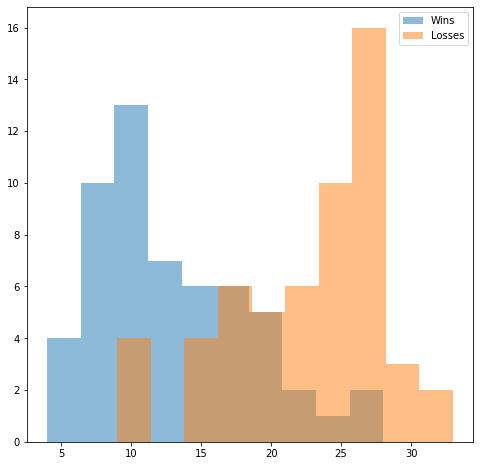

In [18]:
fig = plt.figure(figsize=(8,8))
plt.hist(aggregate_summaryt_season_2011_df.TotalWins, alpha=0.5, label='Wins')
plt.hist(aggregate_summaryt_season_2011_df.TotalLosses, alpha=0.5, label='Losses')
plt.legend(loc='upper right')
plt.show()

#### Now write the raw binary of the image corresponding to the above histogram to the MongoDB team_collection...

In [19]:
fn_wins_losses_hist = 'wins_losses_hist.png'
mongodbmgr.save_or_update_img(fig, fn_wins_losses_hist)

inserted wins_losses_hist.png record into MongoDB image_collection with id: 5e32d005ac400712149f1ab1


#### Now load the record (binary) from the MongoDB team_collection an display it to make sure it was saved...

image {'img': 'wins_losses_hist.png'} found


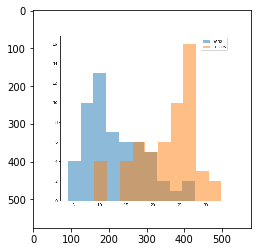

In [20]:
# first close the plot from which we saved so we know for sure we are displaying from the binary in the database
plt.close()

mongodbmgr.load_img(fn_wins_losses_hist)
plt.show()

<p><br><br>

## Finally, let's retrieve each team's win percentage on days where it was raining during games in the 2011 season (and update each record in the database accordingly)

First, so that we don't exhaust our API call limit (1000 calls/day), let's create a DataFrame of distinct dates from season_2011_summary_df...

In [21]:
season_2011_distinct_dates_df = pysqldfmgr.pysqldf("SELECT DISTINCT Date FROM season_2011_summary_df")
season_2011_distinct_dates_df

,Date
0,2012-03-30
1,2011-11-06
2,2012-04-23
3,2012-04-29
4,2012-04-11
...,...
160,2012-01-03
161,2012-01-16
162,2012-04-30
163,2012-03-05


Now get the weather in Berlin, Germany for each distinct date above...

In [22]:
season_2011_distinct_dates_df = mongodbmgr.update_weather_via_dsapi(season_2011_distinct_dates_df)
season_2011_distinct_dates_df

,Date,weather_complete_json,weather_simple
0,2012-03-30,"{""latitude"":52.520008,""longitude"":13.404954,""t...",partly-cloudy-day
1,2011-11-06,"{""latitude"":52.520008,""longitude"":13.404954,""t...",None
2,2012-04-23,"{""latitude"":52.520008,""longitude"":13.404954,""t...",None
3,2012-04-29,"{""latitude"":52.520008,""longitude"":13.404954,""t...",None
4,2012-04-11,"{""latitude"":52.520008,""longitude"":13.404954,""t...",partly-cloudy-day
...,...,...,...
160,2012-01-03,"{""latitude"":52.520008,""longitude"":13.404954,""t...",rain
161,2012-01-16,"{""latitude"":52.520008,""longitude"":13.404954,""t...",snow
162,2012-04-30,"{""latitude"":52.520008,""longitude"":13.404954,""t...",None
163,2012-03-05,"{""latitude"":52.520008,""longitude"":13.404954,""t...",None


In [23]:
season_2011_rainy_dates_df = pysqldfmgr.pysqldf("""
    SELECT 
        Date
        , weather_simple 
    FROM 
        season_2011_distinct_dates_df 
    WHERE
        weather_simple='rain'
""")
season_2011_rainy_dates_df.head()

,Date,weather_simple
0,2012-02-19,rain
1,2011-09-18,rain
2,2012-05-06,rain
3,2011-12-18,rain
4,2012-02-27,rain


In [24]:
season_2011_rainy_summary_df = pysqldfmgr.pysqldf("""
    SELECT 
        TeamName
        , Season
        , Match_ID
        , Date
        , weather_simple
        , Location
        , GF
        , GA
        , Opponent
    FROM 
        season_2011_summary_df 
    JOIN 
        season_2011_rainy_dates_df USING(Date)     
    WHERE
        weather_simple='rain'
""")
season_2011_rainy_summary_df

,TeamName,Season,Match_ID,Date,weather_simple,Location,GF,GA,Opponent
0,Aachen,2011,1386,2012-02-19,rain,HOME,0,0,Hansa Rostock
1,Fortuna Dusseldorf,2011,1698,2012-02-19,rain,AWAY,1,2,Munich 1860
2,Greuther Furth,2011,1531,2012-02-19,rain,AWAY,0,0,Ingolstadt
3,Hannover,2011,1326,2012-02-19,rain,HOME,4,2,Stuttgart
4,Hansa Rostock,2011,1386,2012-02-19,rain,AWAY,0,0,Aachen
...,...,...,...,...,...,...,...,...,...
433,Man City,2011,44689,2012-01-03,rain,HOME,3,0,Liverpool
434,Sunderland,2011,44691,2012-01-03,rain,AWAY,4,1,Wigan
435,Tottenham,2011,44690,2012-01-03,rain,HOME,1,0,West Brom
436,West Brom,2011,44690,2012-01-03,rain,AWAY,0,1,Tottenham


In [25]:
aggregate_goals_season_2011_rainy_df = pysqldfmgr.pysqldf("""
    SELECT 
        TeamName
        , Season
        , COUNT(Match_ID) as GamesPlayed
        , SUM(GF) AS TotalGoals
        , SUM(GA) AS TotalGoalsAgainst
    FROM 
        season_2011_rainy_summary_df
    GROUP BY 
        TeamName
    ORDER BY 
        TeamName ASC
""")

aggregate_wins_season_2011_rainy_df = pysqldfmgr.pysqldf("""
    SELECT 
        TeamName
        , Season
        , COUNT(Match_ID) AS TotalWins
    FROM 
        season_2011_rainy_summary_df
    WHERE 
        GF > GA
    GROUP BY 
        TeamName
    ORDER BY 
        TeamName ASC
""")

aggregate_summary_season_2011_rainy_df = pd.concat(
    [aggregate_goals_season_2011_rainy_df, aggregate_wins_season_2011_rainy_df[['TotalWins']]]
    , axis=1
    , join='inner'
)
aggregate_summary_season_2011_rainy_df['TotalLosses'] = aggregate_summary_season_2011_rainy_df['GamesPlayed'] - aggregate_summary_season_2011_rainy_df['TotalWins']
aggregate_summary_season_2011_rainy_df.head()

,TeamName,Season,GamesPlayed,TotalGoals,TotalGoalsAgainst,TotalWins,TotalLosses
0,Aachen,2011,7,6,5,2,5
1,Arsenal,2011,9,15,13,3,6
2,Aston Villa,2011,8,5,14,3,5
3,Augsburg,2011,6,9,5,5,1
4,Bayern Munich,2011,7,15,6,1,6


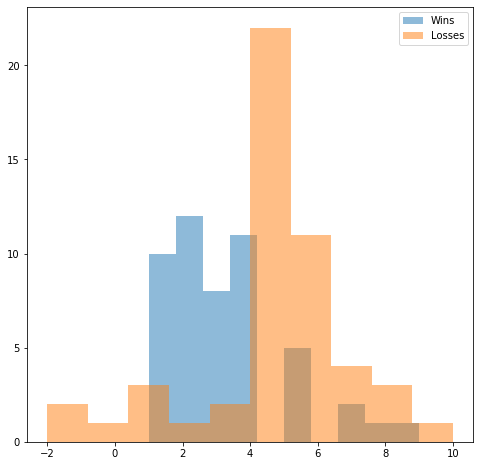

In [26]:
fig = plt.figure(figsize=(8,8))
plt.hist(aggregate_summary_season_2011_rainy_df.TotalWins, alpha=0.5, label='Wins')
plt.hist(aggregate_summary_season_2011_rainy_df.TotalLosses, alpha=0.5, label='Losses')
plt.legend(loc='upper right')
plt.show()

In [27]:
fn_wins_losses_rainy_hist = 'wins_losses_hist_rainy.png'
mongodbmgr.save_or_update_img(fig, fn_wins_losses_rainy_hist)
plt.close()

inserted wins_losses_hist_rainy.png record into MongoDB image_collection with id: 5e32d04eac400712149f1ab2


In [28]:
for _, team_rainy_wins_data in aggregate_summary_season_2011_rainy_df.iterrows():
    record_to_update = {'name' : team_rainy_wins_data[0]}
    d_update = {'rainy_win_rate': team_rainy_wins_data[5]/team_rainy_wins_data[2]}
    update = {'$set': d_update}
    team_coll.update_one(record_to_update, update)

# Summary

In this lab, we dug deep and used everything we've learned so far about python programming, databases, HTTP requests and API calls to ETL data from a SQL database into a MongoDB instance!